# Simple CNN notebook

## Import Libraries

In [2]:
%matplotlib inline
import numpy as np
from utils.helper import read_data, blur, morphology
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
FOLDER = "data/data_big_2/"

## Load data

In [3]:
data_empty = read_data(FOLDER + "empty.csv")
data_1p = read_data(FOLDER + "1p.csv")
data_2p = read_data(FOLDER + "2p.csv")
data_3p = read_data(FOLDER + "3p.csv")
print("----------------Shapes----------------")
print("empty:", data_empty.shape)
print("1p:", data_1p.shape)
print("2p:", data_2p.shape)
print("3p:", data_3p.shape)


----------------Shapes----------------
empty: (720, 5, 3, 64, 64)
1p: (720, 5, 3, 64, 64)
2p: (720, 5, 3, 64, 64)
3p: (720, 5, 3, 64, 64)


In [4]:
data_1p_reshaped = data_1p.reshape(-1, 10, 3, 64, 64)
data_2p_reshaped = data_2p.reshape(-1, 10, 3, 64, 64)
data_3p_reshaped = data_3p.reshape(-1, 10, 3, 64, 64)
data_empty_reshaped = data_empty.reshape(-1, 10, 3, 64, 64)
print(f"data_1p_reshaped: {data_1p_reshaped.shape}")
print(f"data_2p_reshaped: {data_2p_reshaped.shape}")
print(f"data_3p_reshaped: {data_3p_reshaped.shape}")
print(f"data_empty_reshaped: {data_empty_reshaped.shape}")


data_1p_reshaped: (360, 10, 3, 64, 64)
data_2p_reshaped: (360, 10, 3, 64, 64)
data_3p_reshaped: (360, 10, 3, 64, 64)
data_empty_reshaped: (360, 10, 3, 64, 64)


In [5]:
data_empty_abs = np.abs(data_empty_reshaped)
data_1p_abs = np.abs(data_1p_reshaped)
data_2p_abs = np.abs(data_2p_reshaped)
data_3p_abs = np.abs(data_3p_reshaped)
print(f"data_empty_abs: {data_empty_abs.shape}")
print(f"data_1p_abs: {data_1p_abs.shape}")
print(f"data_2p_abs: {data_2p_abs.shape}")
print(f"data_3p_abs: {data_3p_abs.shape}")


data_empty_abs: (360, 10, 3, 64, 64)
data_1p_abs: (360, 10, 3, 64, 64)
data_2p_abs: (360, 10, 3, 64, 64)
data_3p_abs: (360, 10, 3, 64, 64)


In [10]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


def easy_preprocessing(frames):
    frames[:, :, 32, :] = 0
    new_frames = np.zeros((3,64,64))
    for i in range(new_frames.shape[0]):
        new_frames[i,:,:] = normalize_data(np.sum(frames[:,i,:,:], axis = 0).squeeze())

    return new_frames


In [11]:
data_empty_diffs = np.array([easy_preprocessing(sample) for sample in data_empty_abs])
data_1p_diffs = np.array([easy_preprocessing(sample) for sample in data_1p_abs])
data_2p_diffs = np.array([easy_preprocessing(sample) for sample in data_2p_abs])
data_3p_diffs = np.array([easy_preprocessing(sample) for sample in data_3p_abs])

print(f"data_empty_diffs: {data_empty_diffs.shape}")
print(f"data_1p_diffs: {data_1p_diffs.shape}")
print(f"data_2p_diffs: {data_2p_diffs.shape}")
print(f"data_3p_diffs: {data_3p_diffs.shape}")


data_empty_diffs: (360, 3, 64, 64)
data_1p_diffs: (360, 3, 64, 64)
data_2p_diffs: (360, 3, 64, 64)
data_3p_diffs: (360, 3, 64, 64)


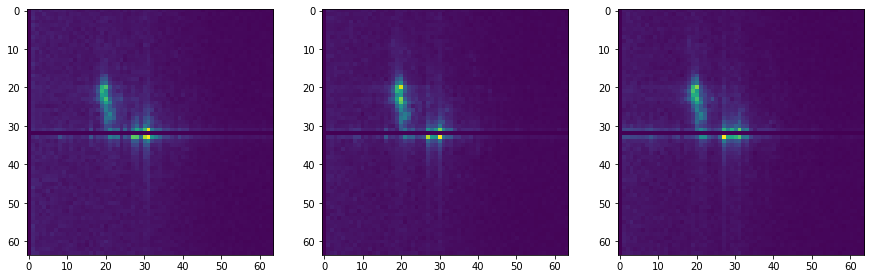

In [12]:
##### plot random sample
random_sample = np.random.randint(0, data_empty_diffs.shape[0])
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_sample = data_1p_diffs.copy()
ax[0].imshow(plot_sample[random_sample, 0, :, :])
ax[1].imshow(plot_sample[random_sample, 1, :, :])
ax[2].imshow(plot_sample[random_sample, 2, :, :])


In [13]:
data_0 = np.moveaxis(data_empty_diffs, 1, 3)
data_1 = np.moveaxis(data_1p_diffs, 1, 3)
data_2 = np.moveaxis(data_2p_diffs, 1, 3)
data_3 = np.moveaxis(data_3p_diffs, 1, 3)
print(data_0.shape)
print(data_1.shape)
print(data_2.shape)
print(data_3.shape)



(360, 64, 64, 3)
(360, 64, 64, 3)
(360, 64, 64, 3)
(360, 64, 64, 3)


In [14]:
data_tot = np.concatenate((data_0, data_1, data_2, data_3), axis=0)
data_tot.shape


(1440, 64, 64, 3)

### Create Labels

In [15]:
labels_empty = np.zeros(data_0.shape[0])
labels_1p = np.ones(data_1.shape[0])
labels_2p = np.ones(data_2.shape[0]) * 2
labels_3p = np.ones(data_3.shape[0]) * 3
labels = np.concatenate((labels_empty, labels_1p, labels_2p, labels_3p), axis=0)
print("Labels shape:", labels.shape)


Labels shape: (1440,)


In [16]:
train_labels_one_hot = np.eye(4)[labels.astype(int)]
print("Labels abels one hot shape:", train_labels_one_hot.shape)


Labels abels one hot shape: (1440, 4)


In [17]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    data_tot, train_labels_one_hot, test_size=0.1, stratify=labels
)
print(f"Shape train_X: {train_X.shape}")
print(f"Shape test_X: {test_X.shape}")
print(f"Shape train_y: {train_y.shape}")
print(f"Shape test_y: {test_y.shape}")


Shape train_X: (1296, 64, 64, 3)
Shape test_X: (144, 64, 64, 3)
Shape train_y: (1296, 4)
Shape test_y: (144, 4)


In [18]:
models = keras.models
layers = keras.layers

model = models.Sequential(
    [
        layers.Conv2D(
            4, input_shape=(64, 64, 3), kernel_size=5, padding="same", activation="relu"
        ),
        layers.MaxPooling2D(2, strides=None, padding="valid"),
        layers.Conv2D(
            4,
            #   input_shape = (32,32, 1),
            kernel_size=3,
            padding="same",
            activation="relu",
        ),
        layers.MaxPooling2D(2, strides=None, padding="valid"),
        layers.Conv2D(
            4,
            #   input_shape = (32,32, 1),
            kernel_size=3,
            padding="same",
            activation="relu",
        ),
        layers.MaxPooling2D(2, strides=None, padding="valid"),
        layers.Conv2D(
            2,
            #   input_shape = (32,32, 1),
            kernel_size=3,
            padding="same",
            activation="relu",
        ),
        layers.MaxPooling2D(2, strides=None, padding="valid"),
        layers.Flatten(),
        layers.Dense(4),
        layers.Activation("softmax"),
    ]
)
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 4)         304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 4)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 4)         148       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 4)          0

In [19]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model.fit(
    train_X,
    train_y,
    epochs=1000,
    verbose=1,
    validation_split=0.1,
    shuffle=True,
    callbacks=keras.callbacks.EarlyStopping(patience=10),
)

model.save("models/CNN_new")


Epoch 1/1000
37/37 [==============================] - 5s 94ms/step - loss: 1.4000 - accuracy: 0.2504 - val_loss: 1.3861 - val_accuracy: 0.3538
Epoch 2/1000
37/37 [==============================] - 3s 92ms/step - loss: 1.3813 - accuracy: 0.4134 - val_loss: 1.3810 - val_accuracy: 0.4077
Epoch 3/1000
37/37 [==============================] - 3s 92ms/step - loss: 1.3491 - accuracy: 0.4091 - val_loss: 1.3091 - val_accuracy: 0.4231
Epoch 4/1000
37/37 [==============================] - 3s 86ms/step - loss: 1.1360 - accuracy: 0.4906 - val_loss: 1.0415 - val_accuracy: 0.4769
Epoch 5/1000
37/37 [==============================] - 3s 92ms/step - loss: 0.9210 - accuracy: 0.5283 - val_loss: 0.9427 - val_accuracy: 0.4846
Epoch 6/1000
37/37 [==============================] - 4s 99ms/step - loss: 0.8536 - accuracy: 0.5412 - val_loss: 0.9088 - val_accuracy: 0.5154
Epoch 7/1000
37/37 [==============================] - 3s 88ms/step - loss: 0.8104 - accuracy: 0.5617 - val_loss: 0.8829 - val_accuracy: 0.5077

INFO:tensorflow:Assets written to: models/CNN_new\assets


INFO:tensorflow:Assets written to: models/CNN_new\assets


In [20]:
loss, aacuracy = model.evaluate(test_X, test_y)
print(f"Loss: {loss}")
print(f"Accuracy: {aacuracy}")


5/5 [==============================] - 0s 19ms/step - loss: 0.2956 - accuracy: 0.9028
Loss: 0.2955795228481293
Accuracy: 0.9027777910232544


In [21]:
from sklearn.metrics import confusion_matrix

predicted = model.predict(test_X)
predicted_label = np.argmax(predicted, axis=1)
true_label = np.argmax(test_y, axis=1)
confusion_matrix(true_label, predicted_label)


5/5 [==============================] - 0s 14ms/step


array([[36,  0,  0,  0],
       [ 0, 34,  2,  0],
       [ 0,  1, 25, 10],
       [ 0,  0,  1, 35]], dtype=int64)